In [1]:
import pandas as pd
import warnings
import sys
import os

def add_current_dir_to_path(current_dir):
    
    if current_dir not in sys.path:
        sys.path.append(current_dir)
        print(f"已将当前目录添加到环境变量")
    else:
        print(f"当前目录已在环境变量中")

add_current_dir_to_path('<your_path>')

from sentiment_agent import SentimentMultiAgentTeam
from sentiment_agent.utils import get_simulated_data_by_llm

warnings.filterwarnings("ignore")

已将当前目录添加到环境变量


In [2]:
base_url = "<your_base_url>"
api_key = "<your_api_key>"
model = "<your_model>"

domain='酒店'
question_type='居住质量'
content_col = 'content'

In [3]:
df = get_simulated_data_by_llm()
df.head()

,content
0,预订时显示的价格与到店后实际收费不一致
1,提前预订的房型到店后被告知无房需加价升级
2,线上承诺的优惠活动到店后无法兑现
3,预订时备注的特殊需求完全未被处理
4,酒店官网信息更新不及时导致行程受影响


In [4]:
team = SentimentMultiAgentTeam(base_url=base_url, api_key=api_key, model=model, domain=domain, question_type=question_type)

SentimentAnalysisAgent starts working...


sentiment analysis complete progress:  25%|█   | 30/120 [00:41<02:03,  1.37s/it]

第30-60行的分析存在输出数量29与输入数量30不一致错误，将重新进行分析，若多次失败，建议减少batch_size的值以提升模型性能。

1<sep>2<sep>2<sep>2<sep>2<sep>2<sep>2<sep>2<sep>2<sep>1<sep>1<sep>1<sep>1<sep>1<sep>1<sep>2<sep>2<sep>2<sep>2<sep>2<sep>2<sep>2<sep>2<sep>2<sep>1<sep>1<sep>1<sep>2<sep>2


sentiment analysis complete progress: 100%|███| 120/120 [02:57<00:00,  1.48s/it]
Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/lf/_b1qxhss6536z18fm2ssx0ym0000gn/T/jieba.cache


sentiment analysis completion completed
TextPreClassificationAgent starts working...


Loading model cost 0.385 seconds.
Prefix dict has been built successfully.


基于残差分析检测到的拐点k=7对应的SSE=109.9551750259422


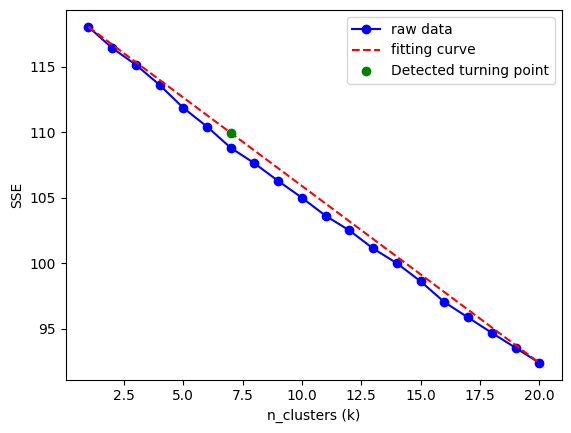

text pre classification complete progress:   0%|          | 0/7 [00:00<?, ?it/s]

第0类分析存在回答遗漏错误，将重新进行分析


text pre classification complete progress: 100%|██| 7/7 [04:04<00:00, 34.94s/it]


text pre classification completion completed
TextClassificationAgent starts working...
Chain of thought: 
用户让我总结酒店领域的居住质量问题，需要把相似的问题合并分类，避免重复。首先，我需要仔细看看用户提供的所有体验问题和推理原因，然后找出共同点进行归类。

首先，用户分了几个部分，每个部分有不同的问题。比如第一部分提到儿童游乐区安全隐患、无障碍设施不完善、周边设施匮乏。这些属于安全设施和周边配套的问题。接下来是价格透明度、预订不符、特殊需求未处理等，这些属于服务预订和价格方面的问题。

然后有关于前台服务效率、态度，押金退还等，属于前台服务质量。房间隔音、卫生差、设备故障这些属于客房设施与卫生。餐饮方面有早餐单一、卫生问题、热菜品质，属于餐饮质量问题。还有客服响应慢、投诉处理低效，属于客户服务问题。

安全方面有消防通道堵塞、设施缺失，隐私侵犯，属于安全与隐私问题。无障碍设施、电梯无障碍缺失，属于无障碍设施问题。周边交通不便、治安隐患，属于周边环境问题。公共区域清洁差、电梯故障，属于公共区域维护。收费不透明的问题，比如停车、娱乐设施，属于收费透明度。

还有设备老化的问题，比如健身房、游戏室，属于设施设备老化。强制消费、服务效率低，属于服务规范性。噪音问题，比如外部施工、设备噪音，属于噪音干扰。床上用品、浴袍清洁，属于布草与客用品卫生。官网信息滞后、客服质量差，属于信息与客服服务。最后，像会议室设施故障、婚庆服务混乱，属于特殊服务问题。

需要确保每个类别不重复，用简要词汇概括。比如把儿童游乐区和泳池标识归到安全隐患，无障碍设施相关的合并，价格和收费相关的合并，前台服务相关的合并，客房卫生和设备合并，餐饮问题合并，客服和投诉处理合并，安全和隐私合并，周边环境包括交通和治安，公共区域维护包括清洁和电梯，设施老化单独一类，服务规范性包括强制消费和效率，噪音问题单独一类，布草卫生，信息客服，特殊服务如会议婚庆等。这样分条列点，应该覆盖所有问题，没有重复。

居住质量问题: 
居住质量问题：1.安全隐患,2.无障碍设施不完善,3.周边配套设施匮乏,4.价格与收费问题,5.预订与房型问题,6.特殊需求与服务问题,7.前台服务质量,8.客房设施与卫生,9.餐饮质量,10.

请对大模型总结的问题标签提供反馈，
如果赞同请回复[y]。
如果不赞同并需要大模型重新总结请回复[n]并提供提示词，请以如下格式回复：
n<sep>xxxx
其中xxxx表示提示词，<sep>为分隔符。
如果您只需要修改大模型总结的部分结论，请以如下格式回复：
1.xx<sep>2.xx<sep>3.xx<sep>...<sep>N.xx
其中xx表示居住质量问题，<sep>为分隔符。
请输入你的反馈： y


text classification complete progress: 100%|██| 120/120 [02:54<00:00,  1.46s/it]


text classification completion completed
TextSummary starts working...


text summary complete progress: 100%|███████████| 19/19 [13:19<00:00, 42.09s/it]


text summary completion completed
ConclusionSummaryAgent starts working...


In [5]:
result_list = await team.batch_run(df=df)

In [9]:
print('\n'.join(result_list[-1].strip().split('\n')[: 3]))

1. 服务规范性，数据占比12.5%，具体问题描述：服务承诺管理机制失效；服务流程存在强制消费导向；财务流程设计不规范；餐饮服务流程执行混乱；产品宣传与实物标准脱节；财务合规管理意识淡薄；定制化服务执行体系缺失；跨部门协作机制不健全；运营信息透明度不足；服务时效与操作规范失控；洗衣服务流程管理粗放；会员体系运营混乱；续住服务沟通机制断裂；餐饮后勤保障效率低下。
2. 设施设备老化，数据占比11.67%，具体问题描述：设备维护保养制度缺失；设施设备采购决策短视；专项预算分配不合理；供应商管理机制失效；环境控制系统老化；维修响应流程低效；技术更新意识滞后；材质选用标准低下；管理责任划分模糊；重大活动保障机制缺位。
3. 客房设施与卫生，数据占比10.0%，具体问题描述：卫生间清洁流程不规范；淋浴设备老化未及时检修；马桶配件质量差或安装不规范；客房装修设计未调研现代用电需求；电视遥控器电池更换不及时；客房清洁质量管控失效；加床采购未遵循人体工学标准；浴室玻璃清洁工具配备不全；灯光设计未区分功能区域；窗帘材质遮光率低；热水供应系统容量匹配不合理；网络电视服务商合作协议内容受限。


In [14]:
result_list[2].head(3)

,class,count,percentage,score,推理原因
0,价格与收费问题,8,0.066667,1.625000,"1.预订定价系统或策略存在问题，存在用低价吸引客人、到店加价的隐性收费情况,2.停车收费未明..."
1,信息与客服服务,1,0.008333,2.000000,"1.酒店内部信息管理流程不完善，未建立官网信息及时更新的责任机制与跨部门协作流程,2.官网技..."
2,公共区域维护,11,0.091667,1.636364,"1.清洁管理体系不完善，未制定合理清洁计划、明确清洁频率标准且清洁人员配置不足,2.网络基础..."


In [17]:
result_list[1][['content', 'score', 'class']].head(3)

,content,score,class
0,预订时显示的价格与到店后实际收费不一致,1,价格与收费问题
1,提前预订的房型到店后被告知无房需加价升级,1,预订与房型问题
2,线上承诺的优惠活动到店后无法兑现,1,服务规范性
